## Оптимизация нейронных сетей

In [1]:
import numpy as np
import matplotlib.pyplot as plt

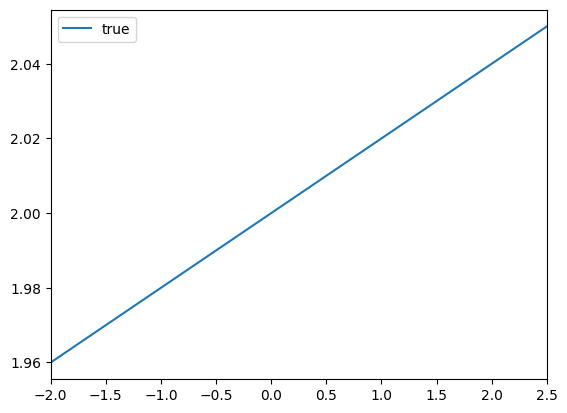

In [2]:
f = lambda x: 0.02 * x + 2
x = np.linspace(-2, 2.5, 10)

plt.plot(x, f(x), label='true')
plt.xlim([-2, 2.5])
plt.legend();

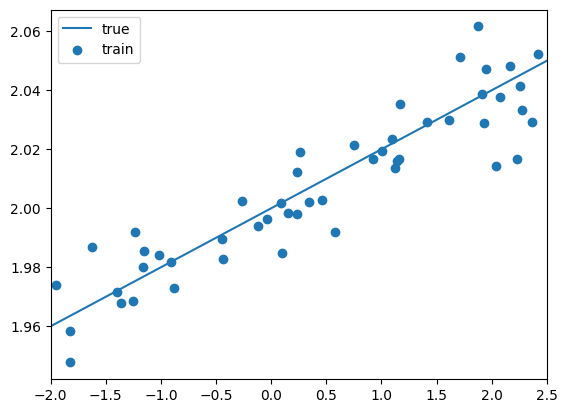

In [3]:
n = 50
np.random.seed(9)
x_train = np.random.uniform(-2, 2.5, n)
y_train = f(x_train) + 0.01 * np.random.randn(n)

plt.plot(x, f(x), label='true')
plt.scatter(x_train, y_train, label='train')
plt.xlim([-2, 2.5])
plt.legend();

In [4]:
weight_1 = 0.5
weight_0 = -9

In [5]:
pred = weight_0 + weight_1 * x_train

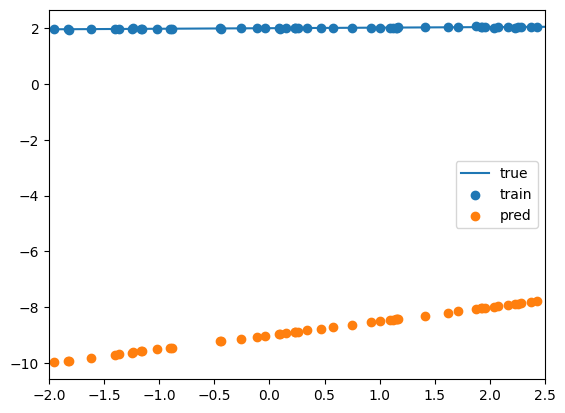

In [6]:
plt.plot(x, f(x), label='true')
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_train, pred, label='pred')
plt.xlim([-2, 2.5])
plt.legend();

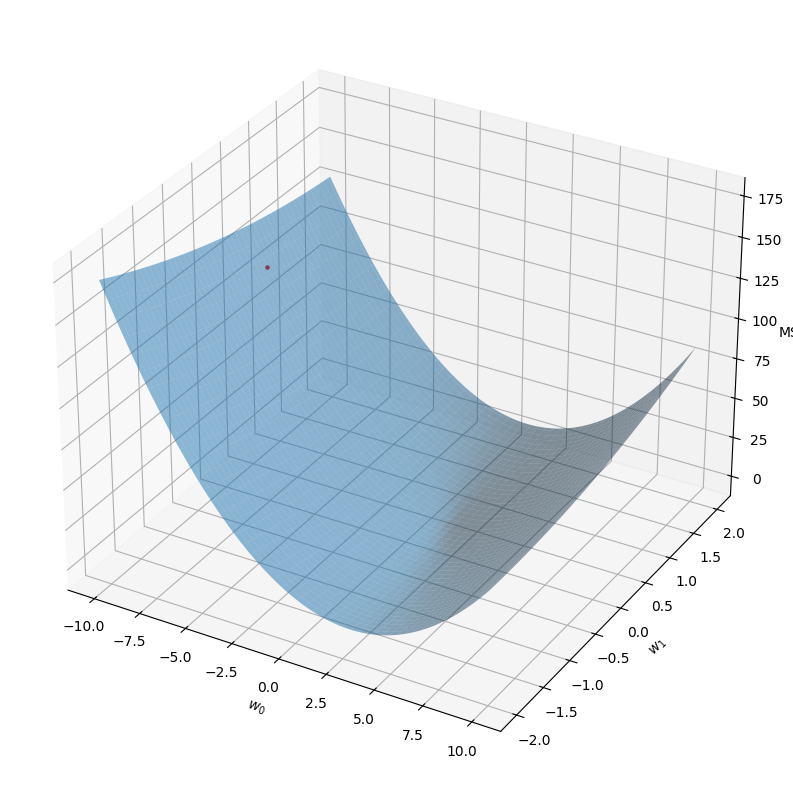

In [7]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)

coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')

plt.show()

In [8]:
# функция градиента
def gr_mserror(X, w0, w1, y):
    y_pred = w1 * X + w0
    return np.array([2 / len(X) * np.sum((y - y_pred)) * (-1),
                     2 / len(X) * np.sum((y - y_pred) * (-X))])

### Алгоритм градиентного спуска

In [9]:
k = 50
lr = 0.1

weights_0, weights_1 = [weight_0], [weight_1]

for i in range(k):
    grad = gr_mserror(x_train, weights_0[-1], weights_1[-1], y_train)

    new_w_0 = weights_0[-1] - lr * grad[0]
    new_w_1 = weights_1[-1] - lr * grad[1]

    weights_0.append(new_w_0)
    weights_1.append(new_w_1)

gd_weights_0 = weights_0.copy()
gd_weights_0

[-9,
 -6.842853811984711,
 -5.186920226846526,
 -3.8877066397526194,
 -2.8508643243530614,
 -2.012715297174011,
 -1.328761412918464,
 -0.766827622695394,
 -0.30290869717815705,
 0.08139613206088747,
 0.40050698988967376,
 0.665921670949684,
 0.886928461920637,
 1.0711032273217804,
 1.2246681255927316,
 1.3527587706353987,
 1.4596287175893683,
 1.5488095233060373,
 1.623238254057834,
 1.6853604209274766,
 1.7372138964686845,
 1.7804978123746948,
 1.8166294117663468,
 1.8467911287091736,
 1.8719696717090422,
 1.8929885252819012,
 1.9105350103958343,
 1.9251828333402627,
 1.9374108859364745,
 1.947618926463698,
 1.9561406623943012,
 1.9632546674750828,
 1.9691934928184769,
 1.9741512714378704,
 1.9782900657286633,
 1.9817451659121446,
 1.984629512942183,
 1.987037390625359,
 1.9890475077427099,
 1.9907255709788818,
 1.9921264327954626,
 1.9932958844769775,
 1.994272152971368,
 1.9950871504597891,
 1.9957675175051273,
 1.9963354938796372,
 1.9968096455384021,
 1.997205471502533,
 1.9975359

In [10]:
gd_weights_1 = weights_1.copy()
gd_weights_1

[0.5,
 1.2870006637040499,
 1.57495910519973,
 1.6034755558648477,
 1.5056389389965201,
 1.3541259204955622,
 1.187545573790087,
 1.0254626826614335,
 0.87693797615654,
 0.7453603096206045,
 0.6311616808414937,
 0.5333265158331935,
 0.45021688585665304,
 0.3800118053900685,
 0.320930659647655,
 0.2713374501640942,
 0.22978058441164156,
 0.19499897335235877,
 0.16591155188852186,
 0.1415995913816614,
 0.12128680183446901,
 0.10431977451102366,
 0.09014996359634575,
 0.07831767309576142,
 0.0684381313477716,
 0.060189545766273805,
 0.05330294703423182,
 0.04755360542275573,
 0.042753804474406014,
 0.03874677362739681,
 0.03540160314706733,
 0.03260898760075537,
 0.03027766589073494,
 0.028331445583262498,
 0.026706716622605306,
 0.02535037451198361,
 0.0242180858515999,
 0.02327283998395095,
 0.022483739658879308,
 0.021824991334797914,
 0.02127506219558453,
 0.020815976376273568,
 0.020432727420473185,
 0.02011278777995507,
 0.019845699332164183,
 0.019622731535794826,
 0.01943659605328

In [11]:
pred = weights_0[-1] + weights_1[-1] * x_train

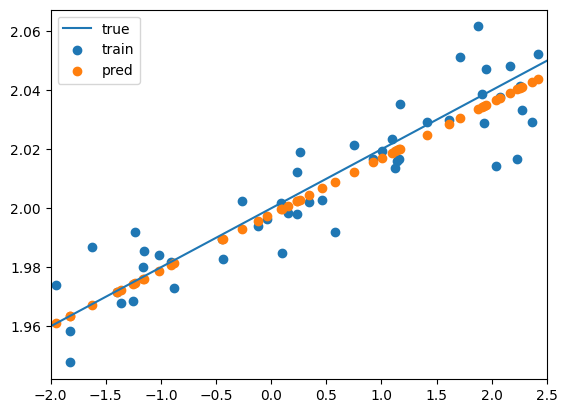

In [12]:
plt.plot(x, f(x), label='true')
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_train, pred, label='pred')
plt.xlim([-2, 2.5])
plt.legend();

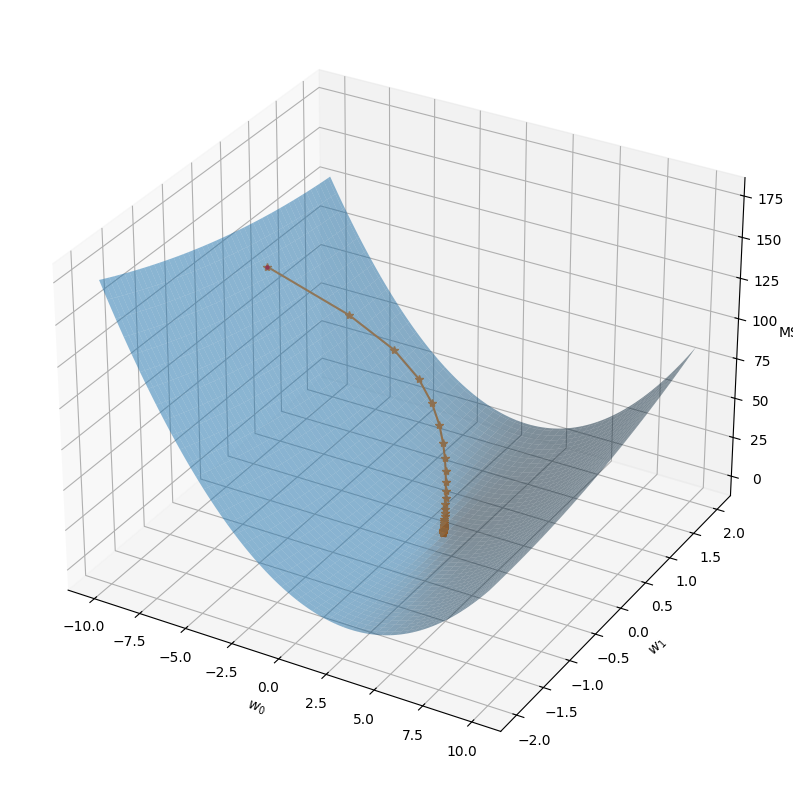

In [14]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)

coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

mses = []
for i in range(len(gd_weights_0)):
    mses.append(mse(gd_weights_0[i], gd_weights_1[i]))
ax.plot(gd_weights_0, gd_weights_1, mses, marker='*')

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')

plt.show()

### Стохастический градиентный спуск

In [15]:
k = 50
lr = 0.1

weights_0, weights_1 = [weight_0], [weight_1]

for i in range(k):
    idx = np.random.choice(len(x_train))
    grad = gr_mserror(x_train[[idx]], weights_0[-1], weights_1[-1], y_train[[idx]])

    new_w_0 = weights_0[-1] - lr * grad[0]
    new_w_1 = weights_1[-1] - lr * grad[1]

    weights_0.append(new_w_0)
    weights_1.append(new_w_1)

gd_weights_0 = weights_0.copy()
gd_weights_0

[-9,
 -6.815416410593148,
 -4.980536379756948,
 -3.5866032980529265,
 -3.002447160986093,
 -1.747323831322639,
 -0.16336222495578712,
 0.49069109347250706,
 0.8130549934190352,
 0.9633131257256021,
 1.418790076701028,
 1.6210752876881278,
 1.768515873589087,
 1.788742795866886,
 1.7815400363102492,
 1.8272051585625677,
 1.8449508043395622,
 1.8203504360142844,
 1.8723796944485807,
 1.8946447741692718,
 1.9257743212086396,
 1.9312552234392577,
 1.945102728671552,
 1.9503836360570612,
 1.951627881458415,
 1.9610808761710554,
 1.9616511522898903,
 1.9671228475706528,
 1.96975907699054,
 1.9641764633380803,
 1.9807404648249591,
 1.9756754514266308,
 1.981069802099281,
 1.9879720380891166,
 1.9926413222086434,
 1.992217674401825,
 1.992463258273335,
 1.9947592009116824,
 1.9935504059561269,
 1.9922263876077206,
 1.9930471802194953,
 1.9932506004010762,
 1.9930122361868012,
 1.9943633113398167,
 1.996481698179865,
 1.99470349379179,
 1.9971165253365721,
 1.9951195066393057,
 2.00076161306619

In [16]:
gd_weights_1 = weights_1.copy()
gd_weights_1

[0.5,
 0.8296166588109013,
 0.012625096031446792,
 -1.9357687326131874,
 -2.730513224536114,
 -2.14654196318567,
 0.9109851350634179,
 0.09374130118848345,
 -0.3568483587296363,
 -0.5319084602957519,
 0.4951138935566394,
 0.31184764712013824,
 0.12761968543038102,
 0.15079939978824208,
 0.1367286945792585,
 0.13139897259434485,
 0.14164564865111734,
 0.0861760400815592,
 0.02555870692228425,
 0.0757626404791526,
 0.047559910228460914,
 0.05642159170956125,
 0.05480540523216671,
 0.060962316305468486,
 0.06168076745247203,
 0.061302643801931775,
 0.061967518054513594,
 0.06279310418691059,
 0.06370229015685304,
 0.057421994666994707,
 0.038123899195408914,
 0.028346884616182365,
 0.037581565723506974,
 0.028957177399634743,
 0.02043278145227205,
 0.019956188663287147,
 0.020012913581503332,
 0.025580842225460136,
 0.023626427528505214,
 0.022136941244903605,
 0.022894477080803007,
 0.022964632877450014,
 0.022853729153822885,
 0.022252154673669214,
 0.023835479013617402,
 0.019825933300

In [17]:
pred = weights_0[-1] + weights_1[-1] * x_train

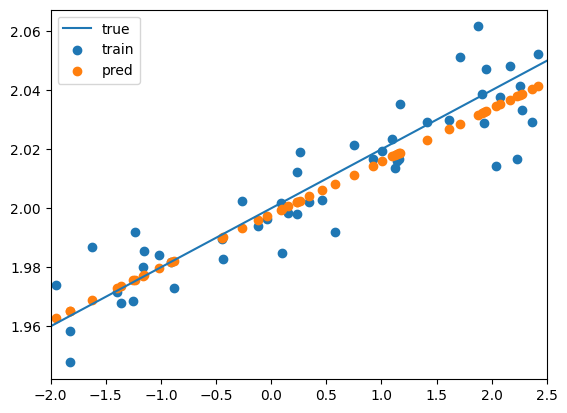

In [18]:
plt.plot(x, f(x), label='true')
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_train, pred, label='pred')
plt.xlim([-2, 2.5])
plt.legend();

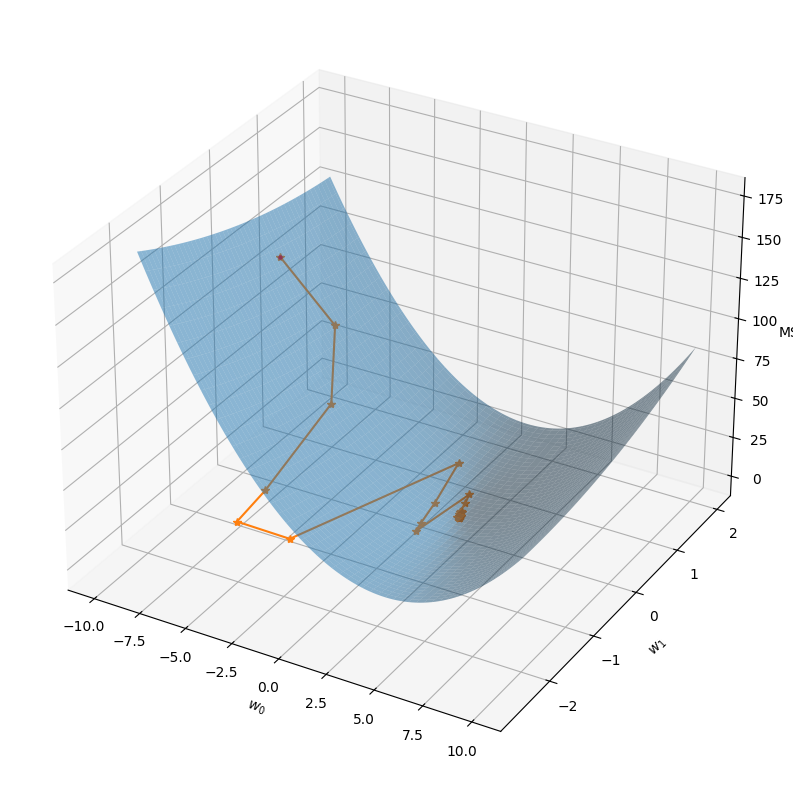

In [19]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)

coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

mses = []
for i in range(len(gd_weights_0)):
    mses.append(mse(gd_weights_0[i], gd_weights_1[i]))
ax.plot(gd_weights_0, gd_weights_1, mses, marker='*')

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')

plt.show()

### Mini-Batch стохастический градиентный спуск

In [20]:
k = 50
lr = 0.1
amount = 10

weights_0, weights_1 = [weight_0], [weight_1]

for i in range(k):
    idx = np.random.choice(len(x_train), size=amount, replace=False)
    grad = gr_mserror(x_train[idx], weights_0[-1], weights_1[-1], y_train[idx])

    new_w_0 = weights_0[-1] - lr * grad[0]
    new_w_1 = weights_1[-1] - lr * grad[1]

    weights_0.append(new_w_0)
    weights_1.append(new_w_1)

gd_weights_0 = weights_0.copy()
gd_weights_0

[-9,
 -6.8631444974880935,
 -5.243532234948031,
 -3.964728683106543,
 -2.761860290490796,
 -1.9602405553175857,
 -1.2614713382579539,
 -0.7051494542787037,
 -0.19130826145581192,
 0.19735493655901348,
 0.4540554872330744,
 0.6954939923074622,
 0.8835714149963764,
 1.0821488249225226,
 1.2715886813242168,
 1.4094460803378102,
 1.5009043928667811,
 1.5824925765190607,
 1.6626290845385507,
 1.70463655505107,
 1.7593113901446469,
 1.8011504276870667,
 1.8351090976818951,
 1.8661914272992615,
 1.8827243218591394,
 1.8994988561775148,
 1.9206850461982232,
 1.9361346260244483,
 1.9475967012787039,
 1.9540227080228576,
 1.9618861035243298,
 1.967859645399778,
 1.9726040876943685,
 1.9766333169463282,
 1.9809981307993545,
 1.9825834901555675,
 1.9856081980924998,
 1.9879306480178538,
 1.9894093752182007,
 1.990551912784717,
 1.9926676698658474,
 1.9942010124225167,
 1.9943086689211535,
 1.9955314793568,
 1.9959728692024066,
 1.9965698724824357,
 1.9976744631148666,
 1.9981875347635751,
 1.99910

In [21]:
gd_weights_1 = weights_1.copy()
gd_weights_1

[0.5,
 1.7246898086829847,
 1.8056945571548562,
 1.4759660011336715,
 0.886515113634535,
 1.2686793523927706,
 1.0185716918578627,
 0.8483567745159718,
 0.6578165049752246,
 0.6745992441640802,
 0.6728158989669826,
 0.5862939750549395,
 0.4646264444928448,
 0.36896555329415204,
 0.23081973094765385,
 0.1740570282212759,
 0.2191683792369032,
 0.17587710234306747,
 0.13478559202490523,
 0.14882521450432554,
 0.10185951769524165,
 0.09260767126628092,
 0.08344085064567047,
 0.0684160306793663,
 0.0732082025007851,
 0.06179484804089026,
 0.044584214228515745,
 0.03506409078807804,
 0.030187867876028424,
 0.03786077062733323,
 0.033328915877003706,
 0.03257680162944758,
 0.032352499359692914,
 0.028800714568742836,
 0.02794820782357884,
 0.026276034837825542,
 0.023972710962987552,
 0.024853920315041442,
 0.024939791802586937,
 0.023582309628305605,
 0.021309115618060377,
 0.02102568220855628,
 0.020140553539480407,
 0.02023144049430441,
 0.021011469719192762,
 0.01836780002731785,
 0.01906

In [22]:
pred = weights_0[-1] + weights_1[-1] * x_train

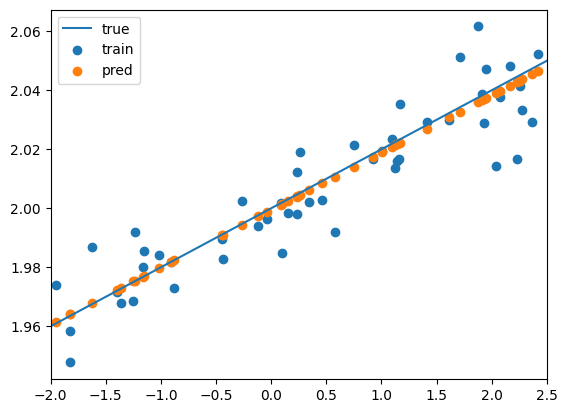

In [23]:
plt.plot(x, f(x), label='true')
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_train, pred, label='pred')
plt.xlim([-2, 2.5])
plt.legend();

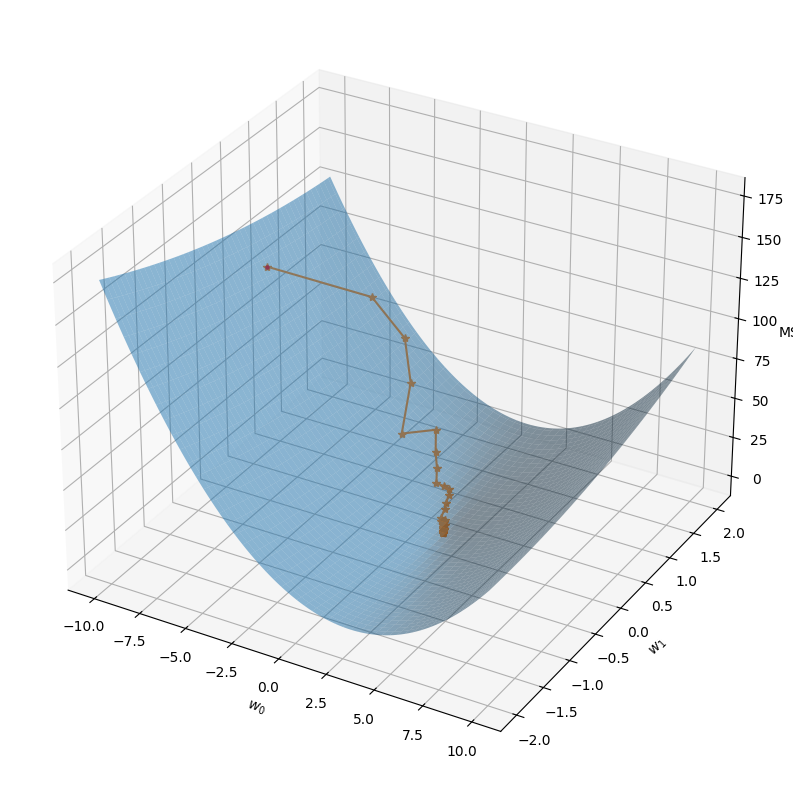

In [24]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)

coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

mses = []
for i in range(len(gd_weights_0)):
    mses.append(mse(gd_weights_0[i], gd_weights_1[i]))
ax.plot(gd_weights_0, gd_weights_1, mses, marker='*')

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')

plt.show()

### Стохастический градиентный спуск + Momentum

In [25]:
k = 50
lr = 0.1
amount = 10

weights_0, weights_1 = [weight_0], [weight_1]

velocity = [0, 0]
momentum = 0.5
for i in range(k):
    idx = np.random.choice(len(x_train), size=amount, replace=False)
    grad = gr_mserror(x_train[idx], weights_0[-1], weights_1[-1], y_train[idx])

    velocity[0] = momentum * velocity[0] - lr * grad[0]
    velocity[1] = momentum * velocity[1] - lr * grad[1]

    new_w_0 = weights_0[-1] + velocity[0]
    new_w_1 = weights_1[-1] + velocity[1]

    weights_0.append(new_w_0)
    weights_1.append(new_w_1)

momentum_sgd_weights_0 = weights_0.copy()
momentum_sgd_weights_0

[-9,
 -6.80285136109089,
 -3.9715915774580517,
 -1.417504885563678,
 0.3465286892411563,
 1.4512964697568411,
 2.125852394758322,
 2.3937708226452443,
 2.45038378575563,
 2.4002146678710354,
 2.327413294780666,
 2.241675262348407,
 2.160083930519824,
 2.083319928150862,
 2.0258768999052634,
 1.9905053836829067,
 1.9667361981046803,
 1.9598221093015065,
 1.9635721447012142,
 1.974223700360884,
 1.985603309484002,
 1.9940891057665764,
 1.9993422120413833,
 2.0014724400912556,
 2.001862689754177,
 2.001845318247777,
 2.001608318552937,
 2.000392954356415,
 1.9992092827544294,
 1.99855265837311,
 1.9983659689574171,
 1.9990029617912928,
 1.998700247586428,
 1.9992064263409701,
 1.9986408010455081,
 1.9983736437335389,
 1.99835531952432,
 1.9983547117417988,
 1.998203359484949,
 1.9990087486040924,
 1.9992881018795838,
 1.9998030104881015,
 1.9991263192673352,
 1.999505620808297,
 1.999044780768468,
 1.9990118583555525,
 1.9994584804870885,
 1.9999445993098028,
 2.0000576558446626,
 2.00073